<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Loan_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Loan_dataset2_train.csv')

# View basic info
print("Shape of the dataset:", df.shape)
print("\nDataset Info:")
print(df.info())

# Display first 5 rows
df.head()


Shape of the dataset: (614, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


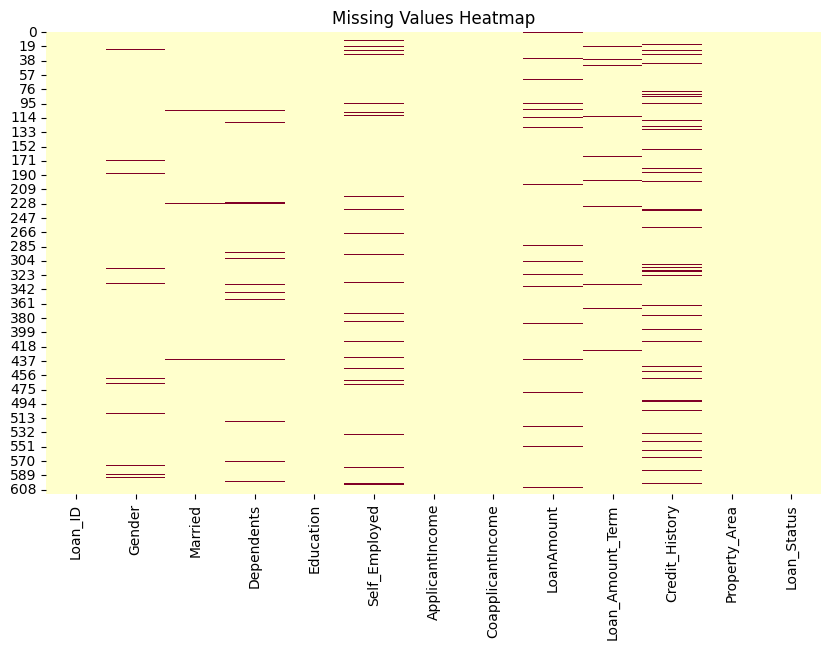

In [5]:
#Check for Missing Values
missing_values=df.isnull().sum()
print(missing_values)


# Visual representation (optional, if you want to install seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

<ipython-input-11-5853bee0840e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Loan_Status', palette='viridis')


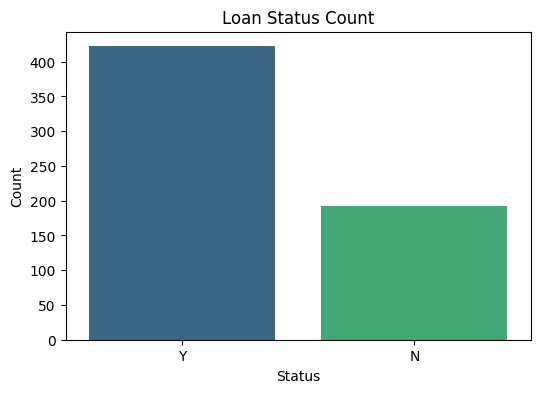

In [11]:
#Count plot of loan, status
#Count plot of loan, status
import matplotlib.pyplot as plt
import seaborn as sns # make sure to import seaborn

# The figsize argument needs to be passed as a keyword argument
plt.figure(figsize=(6,4))

# Verify the actual column name and correct it if needed
# If the column name is 'Loan_Status', use it instead:
sns.countplot(data=df, x='Loan_Status', palette='viridis')

# If the name is different, replace 'Loan_Status' accordingly

plt.title('Loan Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

<ipython-input-12-96ad3da140c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
<ipython-input-12-96ad3da140c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
<ipython-input-12-96ad3da140c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
<ipython-input-12-96ad3da140c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

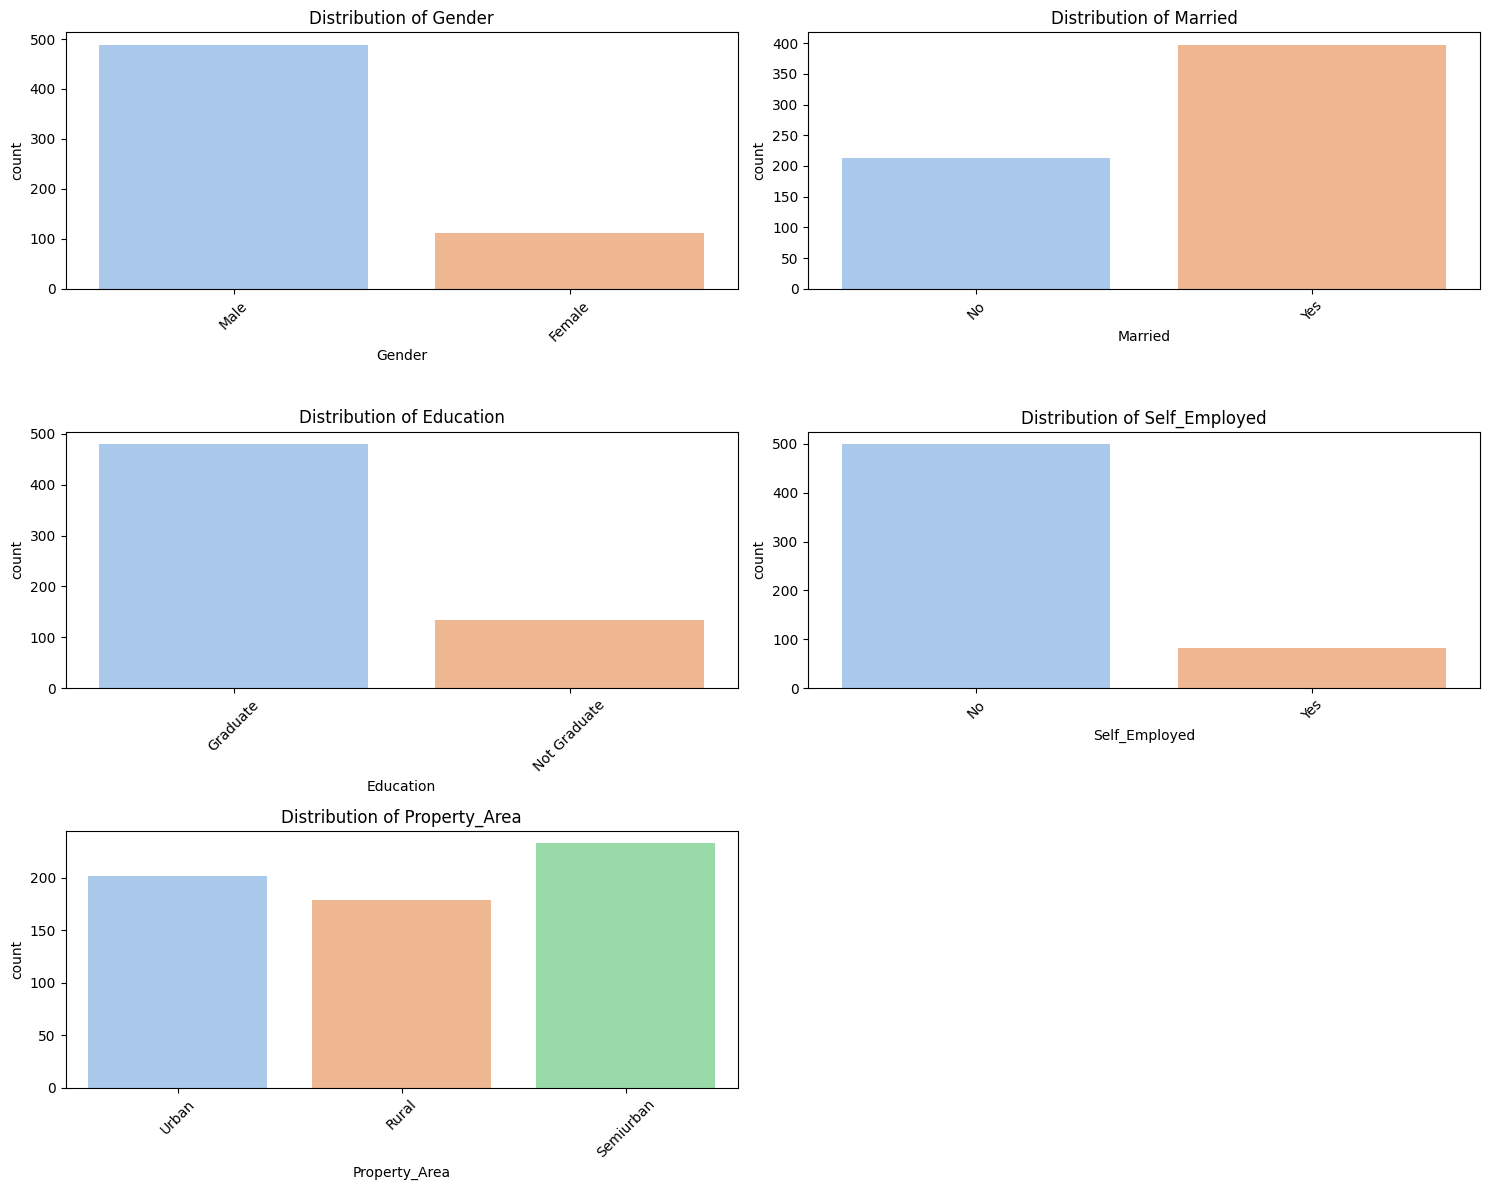

In [12]:
# List of categorical columns
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
# Plotting count plots for each
plt.figure(figsize=(15,12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

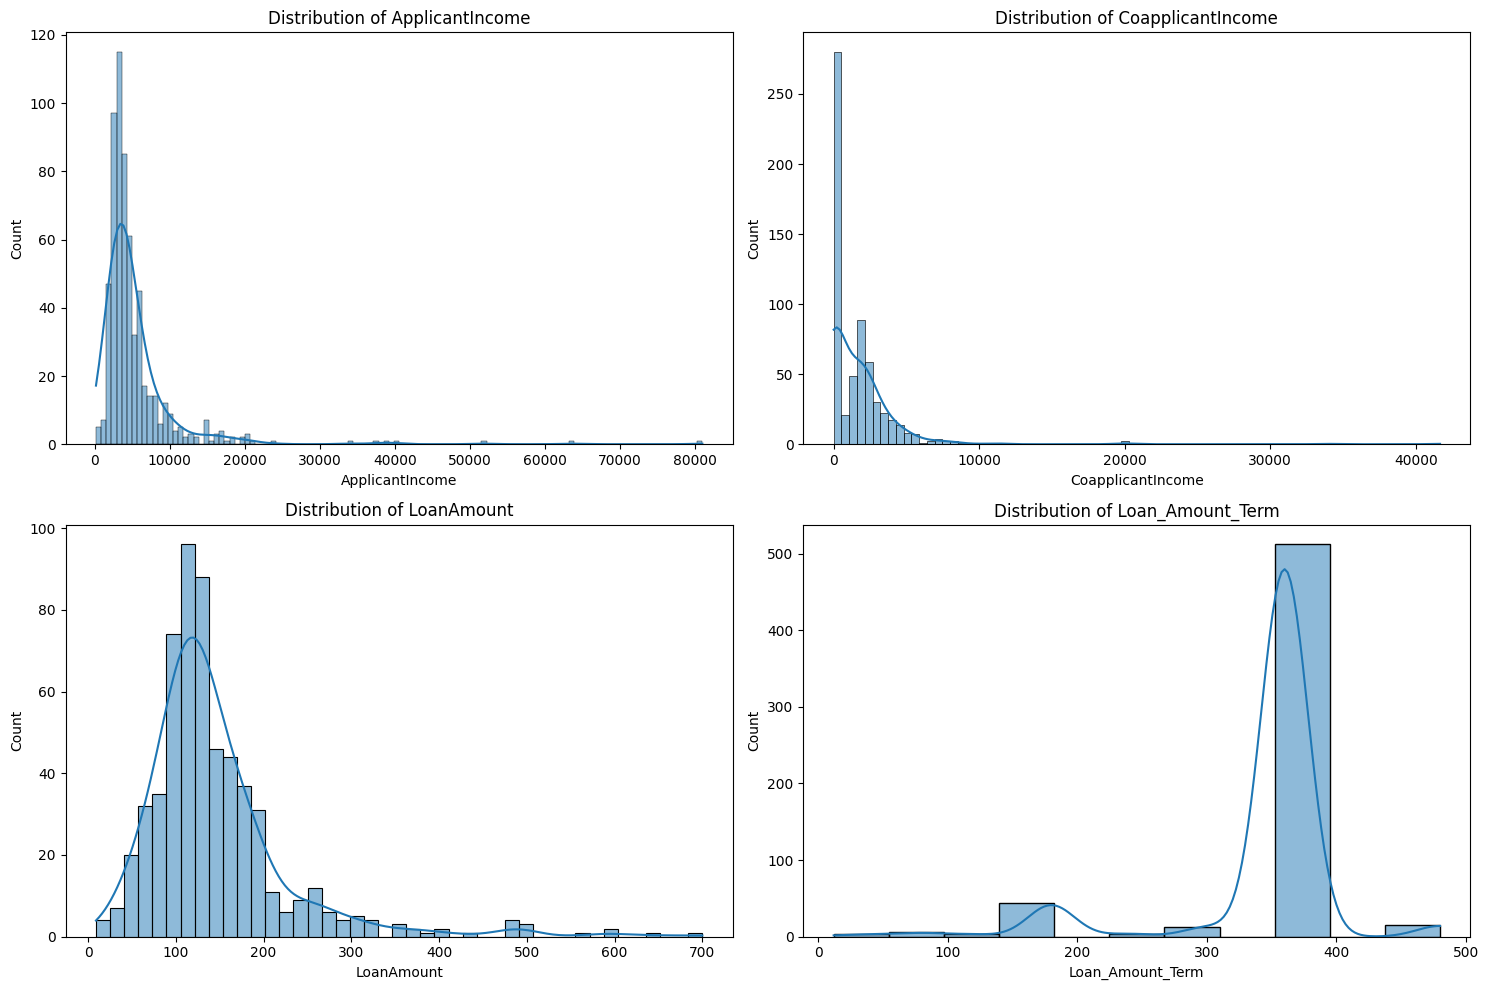

In [13]:
# List of numerical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols,1):
  plt.subplot(2,2,i)
  sns.histplot(data=df,x=col,kde=True)
  plt.title(f'Distribution of {col}')
plt.tight_layout()

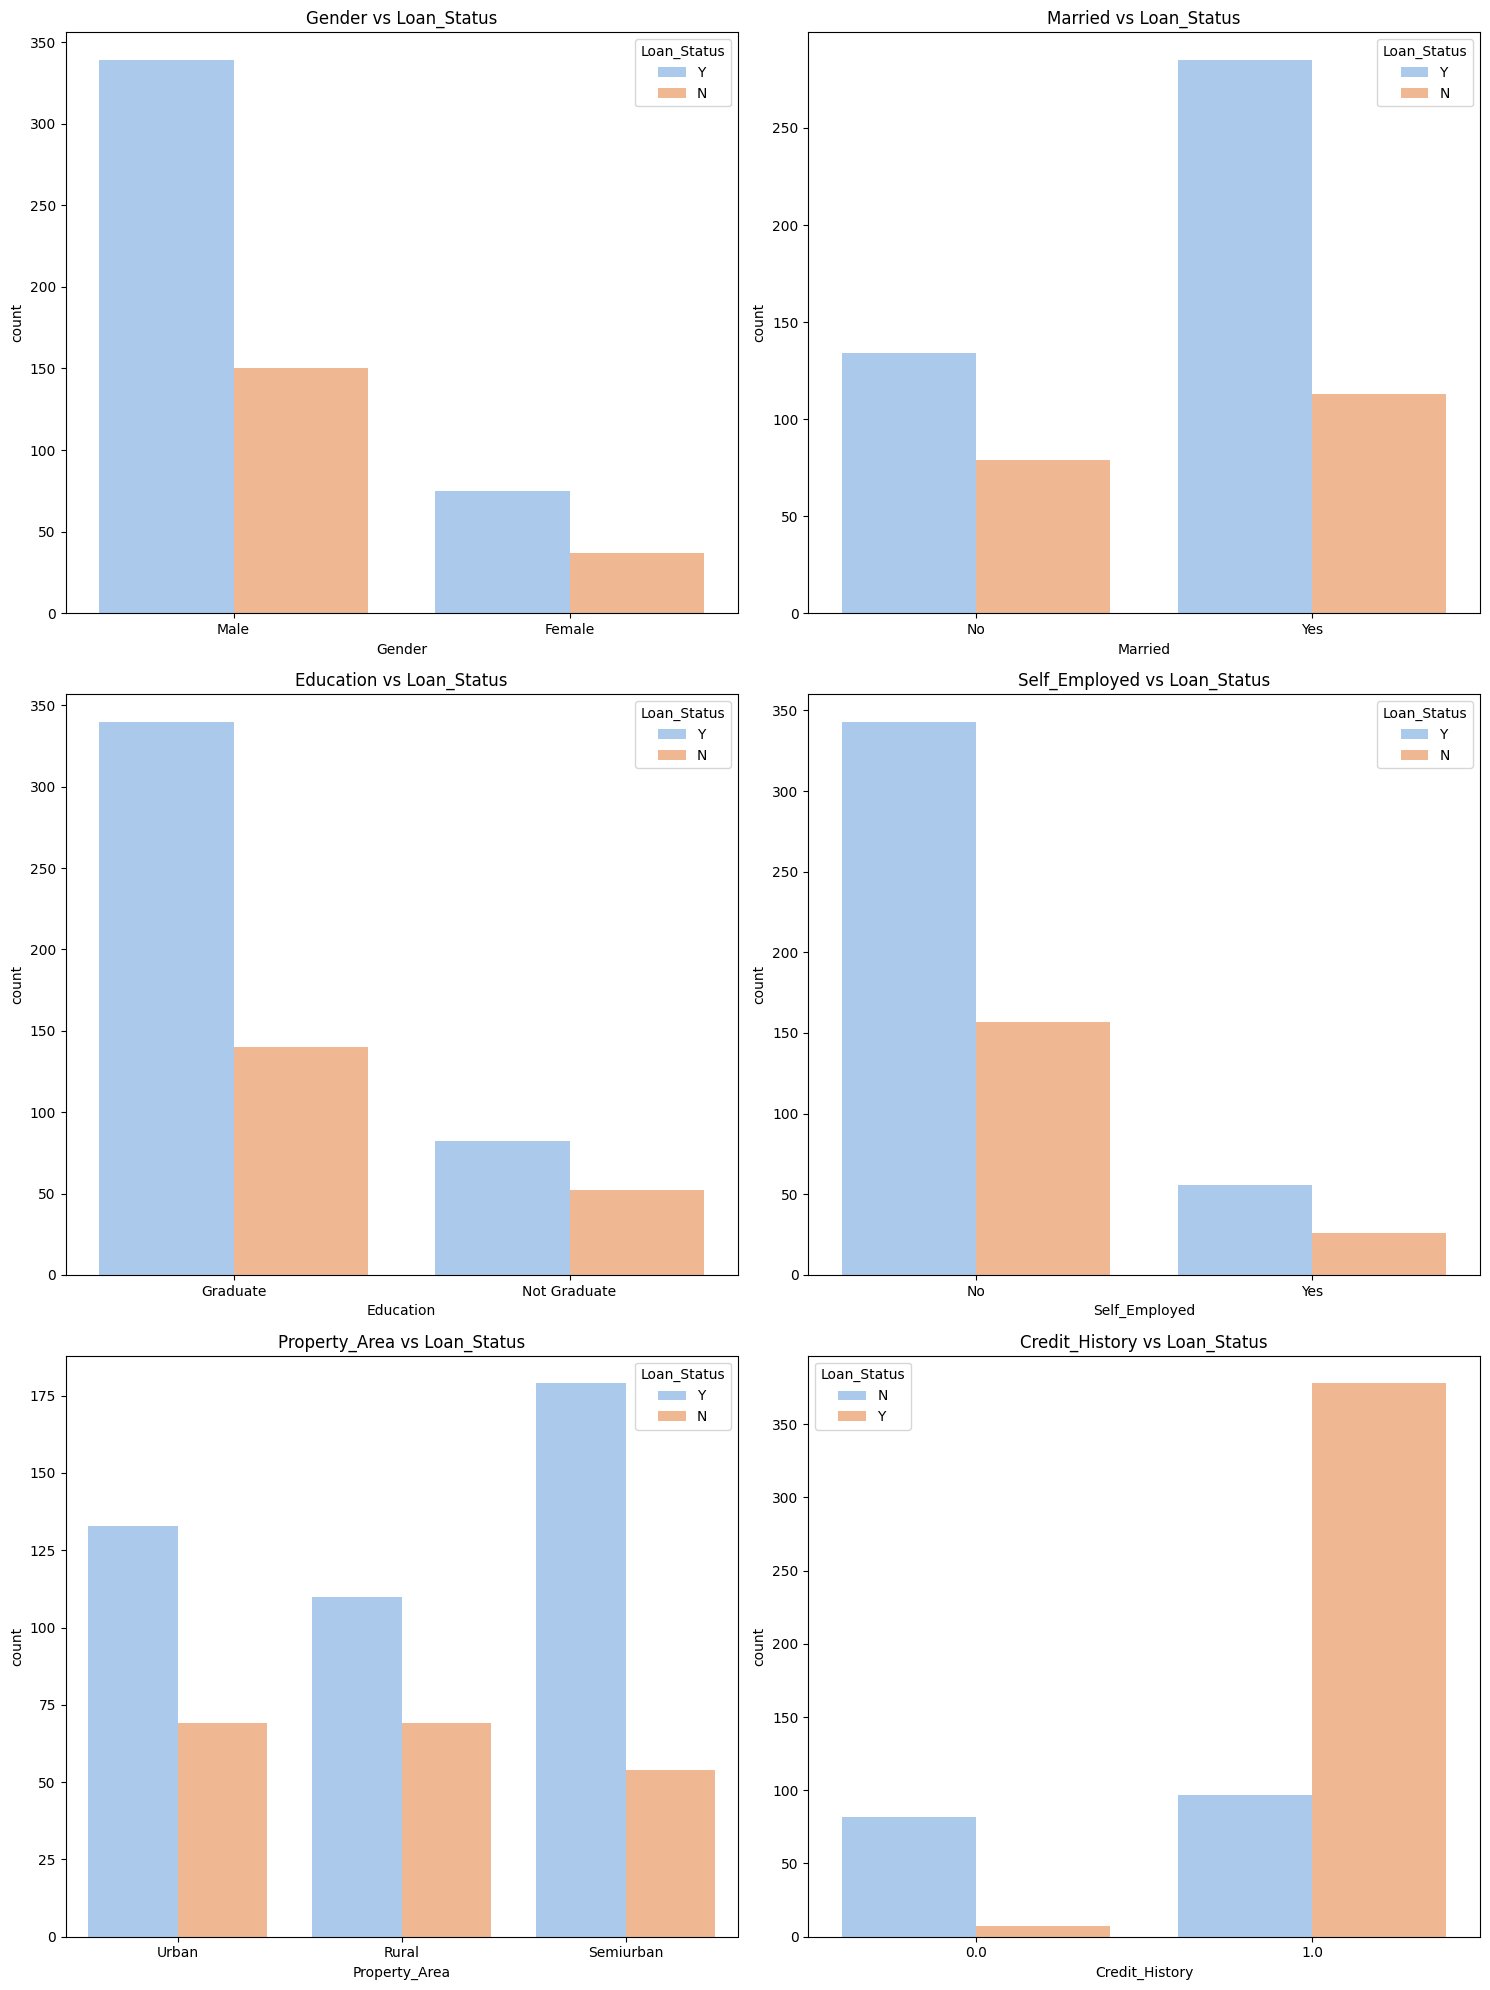

In [15]:
# Bivariate Analysis (Categorical Features vs. Loan_Status)
# Categorical columns
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

plt.figure(figsize=(15, 20))
for i,col in enumerate(categorical_cols,1):
  plt.subplot(3,2,i)
  sns.countplot(data=df,x=col,hue='Loan_Status',palette='pastel')
  plt.title(f'{col} vs Loan_Status')
  plt.legend(title='Loan_Status')

plt.tight_layout()
plt.show()

<ipython-input-16-8bc765cb0f08>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df, palette='coolwarm')
<ipython-input-16-8bc765cb0f08>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df, palette='coolwarm')
<ipython-input-16-8bc765cb0f08>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df, palette='coolwarm')


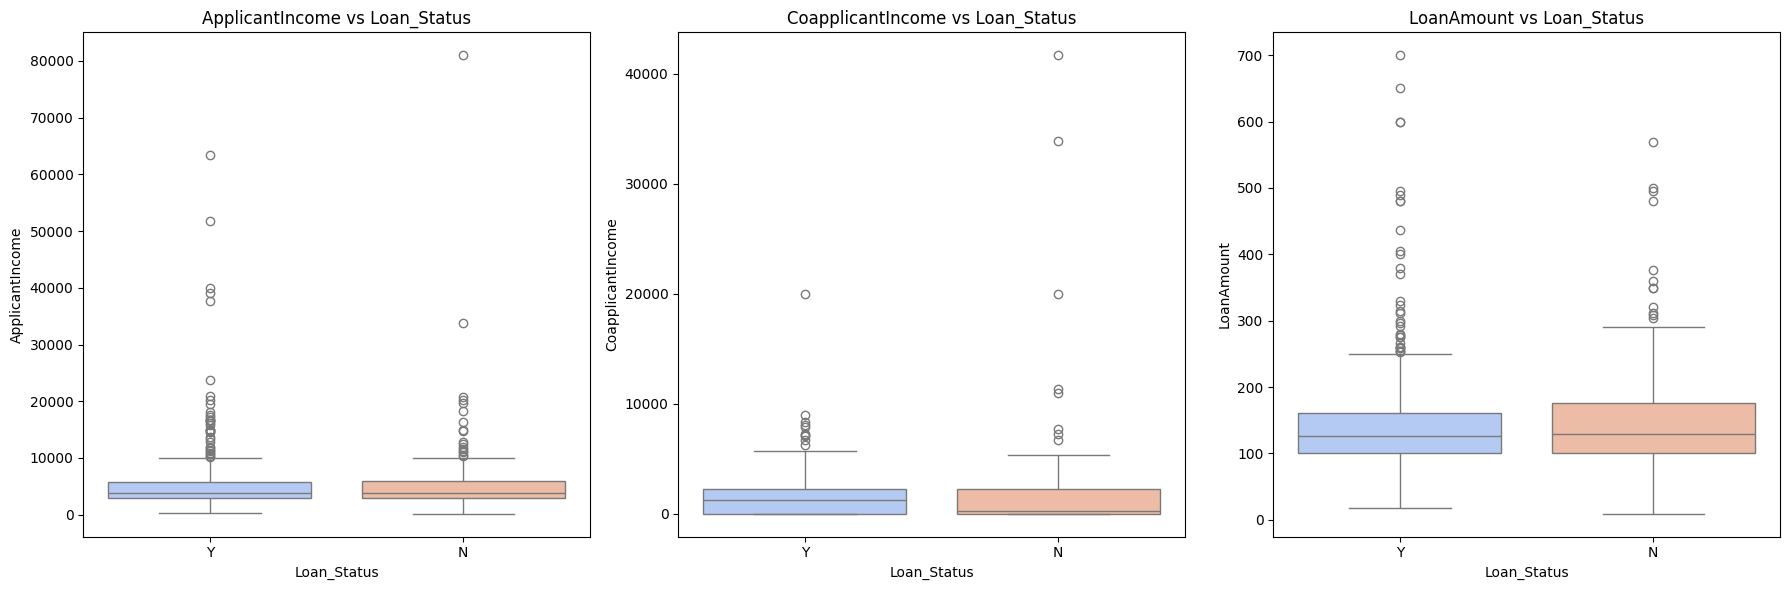

In [16]:
#: Bivariate Analysis on Numerical Features vs. Loan_Status
# Numerical columns to analyze
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.figure(figsize=(18, 6))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Loan_Status', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Loan_Status')

plt.tight_layout()
plt.show()


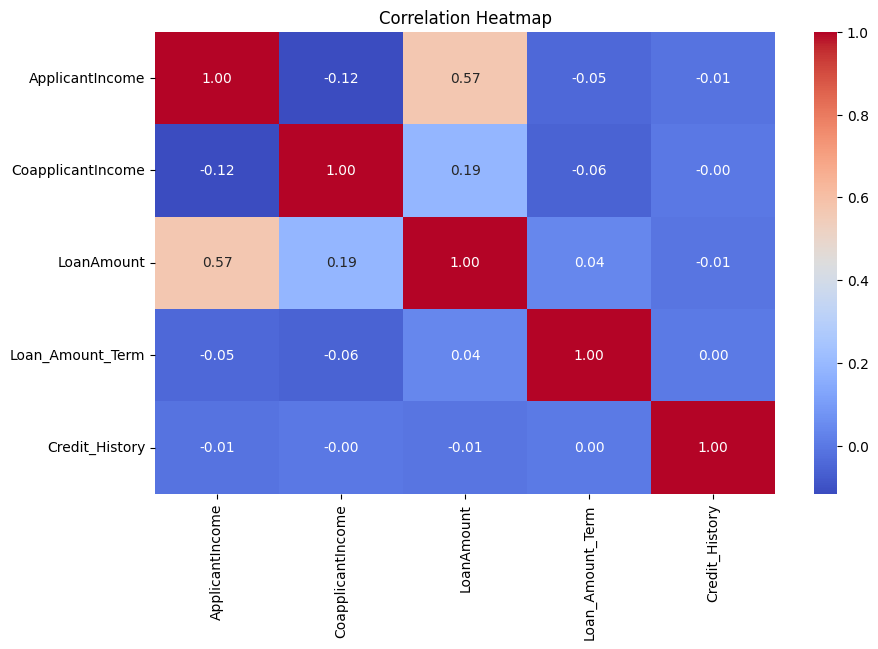

In [17]:
 #Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [19]:
#Handling Missing Values
missing=df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing Values:\n", missing)

Missing Values:
 Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64


In [20]:
# Impute missing values with the median for numerical columns
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['ApplicantIncome']=df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())
df['CoapplicantIncome']=df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median())


In [23]:
## Impute missing values with the mode for categorical columns
df['Gender']=df['Gender'].fillna(df['Gender']).mode()[0]
df['Married']=df['Married'].fillna(df['Married']).mode()[0]
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed']).mode()[0]

In [24]:
print(df.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [27]:
#Creating a Total_Income Feature
import numpy as np
df['Total_income']=df['ApplicantIncome']+df['CoapplicantIncome']
#Applying Log Transformation
#Log helps normalize skewed data like income and loan amount, making patterns easier to learn for models.
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['TotalIncome_log']=np.log(df['Total_income'])

In [28]:
from sklearn.preprocessing import LabelEncoder

cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df = pd.get_dummies(df, columns=['Property_Area', 'Dependents'], drop_first=True)


In [30]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns, **correcting the column name to 'Total_income'**
df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_income'], axis=1, inplace=True)

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# ... (your previous code for loading and preprocessing) ...

# Assuming 'df'